In [2]:
import glob
import numpy as np
import cv2
import os
import json
video_files1 =  glob.glob('deeperforensics\end_to_end\*.mp4')

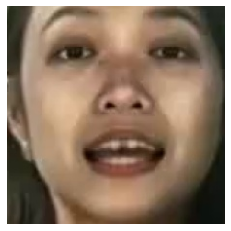

In [27]:
import matplotlib.pyplot as plt

# Pfad zum Bild angeben
image_path = r"data\test\fake\001_W101_0.jpg"

# Bild mit Matplotlib einlesen
image = plt.imread(image_path)

# Bild anzeigen
plt.imshow(image)
plt.axis('off')  # Deaktivieren der Achsenbeschriftung
plt.show()

1/1 [==============================] - 0s 93ms/step


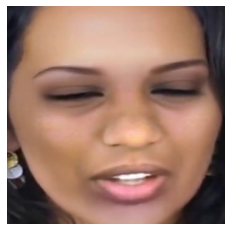

1/1 [==============================] - 0s 18ms/step


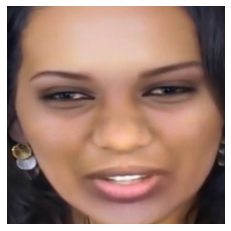

In [18]:
import cv2
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt

def extract_faces_from_video(video_path, num_frames, output_dir, filename, seed=42):
    import cv2
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import os

def extract_faces_from_video(video_path, num_frames, output_dir, filename, seed=42):
    capture = cv2.VideoCapture(video_path)
    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if frame_count <= 0:
        capture.release()
        return
    
    detector = MTCNN()
    
    # Zufällige Frame-Indizes auswählen
    np.random.seed(seed)
    frame_idxs = np.random.choice(frame_count, size=num_frames, replace=False)
    
    n=0
    for frame_idx in frame_idxs:
        # Frame an der aktuellen Indexposition lesen
        capture.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = capture.read()
        
        if not ret:
            continue
        
        # Gesichter im aktuellen Frame erkennen
        faces = detector.detect_faces(frame)
        
        if len(faces) == 0:
            continue
        
        # Das beste Gesicht auswählen
        best_face = max(faces, key=lambda f: f['confidence'])
        bounding_box = best_face['box']
        x, y, w, h = bounding_box
        
        # Gesicht im Frame ausschneiden
        face_image = frame[y:y+h, x:x+w]
        
        resized_face = cv2.resize(face_image, (244, 244), interpolation=cv2.INTER_AREA)
        resized_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB)
                
        #destination_path = os.path.join(output_dir, filename[:-4])
        #cv2.imwrite(destination_path+"_"+str(n)+".jpg", resized_face)
        # Ausgeschnittenes Gesicht mit Matplotlib anzeigen
        plt.imshow(resized_face)
        plt.axis('off')  # Deaktivieren der Achsenbeschriftung
        plt.show()
        
        # Ausgeschnittenes Gesicht mit Matplotlib speichern
        output_path = os.path.join(output_dir, f"{filename[:-4]}_{n}.jpg")
        plt.imsave(output_path, resized_face)
                
        n += 1 
    
    capture.release()


# Beispielaufruf der Funktion
video_path = r"raw\deeperforensics\end_to_end\223_W037.mp4"
num_frames = 2
output_dir = "raw"
filename = "223_W037.mp4"

extract_faces_from_video(video_path, num_frames, output_dir, filename)


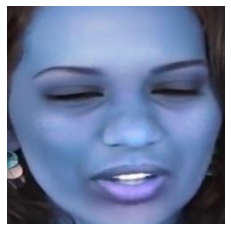

In [26]:
import cv2

import cv2

def check_image_format(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Bild konnte nicht geladen werden.")
        return
    
    # Bild anzeigen
    plt.imshow(image)
    plt.axis('off')
    plt.show()

check_image_format(r"E:\Masterarbeit\deepfake-detection\raw\223_W037_0.jpg")

In [3]:
#change the path accordingly
frame_count = []
for video_file in video_files1:
  cap = cv2.VideoCapture(video_file)
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
print("Max frame:", np.max(frame_count))
print("Min frame:", np.min(frame_count))

frames [396, 460, 693, 303, 309, 385, 310, 505, 637, 588, 474, 632, 363, 332, 676, 437, 678, 398, 432, 1385, 390, 431, 325, 553, 306, 747, 322, 315, 434, 416, 297, 482, 310, 809, 407, 423, 337, 454, 299, 609, 548, 349, 338, 495, 335, 350, 504, 319, 485, 360, 530, 717, 323, 417, 368, 394, 373, 431, 669, 721, 844, 337, 423, 930, 402, 442, 435, 538, 401, 774, 367, 453, 311, 703, 345, 613, 329, 611, 523, 424, 483, 1170, 316, 545, 375, 329, 935, 309, 665, 751, 687, 639, 460, 308, 559, 1006, 504, 478, 299, 613, 423, 1148, 389, 595, 462, 300, 356, 556, 300, 298, 565, 433, 418, 841, 1269, 320, 327, 548, 352, 502, 405, 553, 309, 514, 318, 500, 328, 864, 735, 330, 662, 306, 413, 767, 346, 327, 611, 606, 410, 378, 485, 508, 962, 414, 344, 475, 1003, 667, 475, 363, 456, 347, 313, 732, 594, 829, 518, 486, 444, 325, 534, 369, 685, 304, 1021, 387, 756, 341, 1228, 649, 504, 541, 752, 721, 414, 504, 376, 410, 521, 1260, 569, 478, 620, 390, 1254, 875, 334, 986, 310, 512, 331, 372, 287, 372, 567, 333, 42

In [11]:
def get_video_resolution(video_paths):
    resolutions = []
    for video_path in video_paths:
        video = cv2.VideoCapture(video_path)
        width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
        video.release()
        resolutions.append((width, height))
    return resolutions

def calculate_average_resolution(resolutions):
    total_width = 0
    total_height = 0
    for resolution in resolutions:
        width, height = resolution
        total_width += width
        total_height += height
    average_width = total_width / len(resolutions)
    average_height = total_height / len(resolutions)
    return int(average_width), int(average_height)


def calculate_average_length(videopaths):
    video_durations = []  # Liste zur Speicherung der zeitlichen Länge für jedes Video

    # Zeitliche Länge für jedes Video berechnen
    for video_file in videopaths:
        capture = cv2.VideoCapture(video_file)
        frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = capture.get(cv2.CAP_PROP_FPS)
        duration = frame_count / fps
        video_durations.append(duration)

    average_duration = sum(video_durations) / len(video_durations)  # Durchschnittliche zeitliche Länge berechnen

    print("Durchschnittliche zeitliche Länge pro Video (in Sekunden):", average_duration)


#resolutions = get_video_resolution(video_files1)
#average_width, average_height = calculate_average_resolution(resolutions)
#print(f"Durchschnittliche Auflösung: {average_width}x{average_height}")
calculate_average_length(video_files1)

Durchschnittliche zeitliche Länge pro Video (in Sekunden): 18.7089884291188


In [35]:
print(np.random.seed(3))
print(np.random.choice(np.arange(0, 396), 50, replace=False))


None
[356  16 290  81 112 299 357 387 115 102 271 229 393 190 155 128  37  56
 347 379 189 269  15  40 224  61 209 146 134  24 311 136 372 266  82 355
 301 342 313 309  31  84 166 197 265 116 144 126 255 292]


In [17]:
def read_random_frames(path, num_frames, seed=2):
    capture = cv2.VideoCapture(path)
    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(frame_count)
    

    if frame_count <= 0:
        capture.release()
        return None

    np.random.seed(seed)
    
    step = frame_count // num_frames
    start_offset = np.random.randint(0, step)
    frame_idxs = np.arange(start_offset, frame_count, step)
    frame_idxs = np.clip(frame_idxs, 0, frame_count - 1)
    
    capture.release()
    return frame_idxs
    
print(read_random_frames(r"raw\deeperforensics\end_to_end\000_M101.mp4", 50))

396
[  0   7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119
 126 133 140 147 154 161 168 175 182 189 196 203 210 217 224 231 238 245
 252 259 266 273 280 287 294 301 308 315 322 329 336 343 350 357 364 371
 378 385 392]


In [ ]:
import cv2

def count_i_frames(video_paths):
    i_frame_counts = []

    for video_path in video_paths:
        video_capture = cv2.VideoCapture(video_path)
        i_frame_count = 0

        while True:
            ret, frame = video_capture.read()
            if not ret:
                break

            frame_type = int(frame[1][0][0])  # Extrahiere den Frame-Typ (pict_type)

            # Überprüfe, ob der Frame-Typ ein I-Frame ist
            if frame_type == 1:
                i_frame_count += 1

        video_capture.release()
        i_frame_counts.append(i_frame_count)

    return i_frame_counts

# Beispielaufruf
i_frame_counts = count_i_frames(video_files1)

for i, video_path in enumerate(video_files1):
    i_frame_count = i_frame_counts[i]
    print(f"Anzahl der I-Frames für {video_path}: {i_frame_count}")

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Load img to tf dataset

224x224 cvit, resnet, efficientnet 128x128
229x229  xception
batch size 16, 32,64,128

augmentation: color saturation change (CS), color contrast change
(CC), local block-wise (BW), white Gaussian noise in color
components (GNC), Gaussian blur (GB) and JPEG compression (JPEG).

In [4]:
images = tf.data.Dataset.list_files('raw\dfdc_train_part_0\*.mp4')

#check
images.as_numpy_iterator().next()

def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [ ]:
images = images.map(load_image)
images.as_numpy_iterator().next()
type(images)


Test Data Statistics

In [16]:
import json

def load_metadata(dir_path):
    metafile = os.path.join(dir_path, "metadata.json")
     
    if os.path.isfile(metafile):
        with open(metafile) as data_file:
            data = json.load(data_file)
    else:
        return None
    
    return data

json = load_metadata(r"E:\Masterarbeit\deepfake-detection\raw\dfdc_train_part_0")
print(json)

{'owxbbpjpch.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'wynotylpnm.mp4'}, 'vpmyeepbep.mp4': {'label': 'REAL', 'split': 'train'}, 'fzvpbrzssi.mp4': {'label': 'REAL', 'split': 'train'}, 'htorvhbcae.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'wclvkepakb.mp4'}, 'fckxaqjbxk.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'vpmyeepbep.mp4'}, 'sphirandia.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'jawgcggquk.mp4'}, 'vsmadeuczx.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'qarqtkvgby.mp4'}, 'ohaqlzfnuv.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'sttnfyptum.mp4'}, 'komngcqveq.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'kqlvggiqee.mp4'}, 'iafvzgpbix.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'lzbmwwejxb.mp4'}, 'uaukglhmje.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'jytrvwlewz.mp4'}, 'syxobtuucp.mp4': {'label': 'REAL', 'split': 'train'}, 'dtjcyzgdts.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'wc

In [15]:
json = load_metadata("dfsad")
if json:
    print("json erfolgreich")
else:
    print("nicht erfolgreich")

nicht erfolgreich


In [43]:
def filter_dfdc_files(metadata):
    fake=[]
    original=[]
    for file_dp in metadata:
        if (('original' in metadata[file_dp]) and (metadata[file_dp]['original'] is not None)):
            original.append(metadata[file_dp]['original'])
            fake.append(file_dp)
    return np.array([[i, j] for i, j in zip(fake, original)]).ravel()

print(filter_dfdc_files(json))
print(len(filter_dfdc_files(json)))

['owxbbpjpch.mp4' 'wynotylpnm.mp4' 'htorvhbcae.mp4' ... 'fufcmupzen.mp4'
 'etychryvty.mp4' 'uqtqhiqymz.mp4']
2496


In [41]:
label_counts = {}

for item in json.values():
    label = item.get('label')
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

print(label_counts)

{'FAKE': 1248, 'REAL': 86}


In [10]:
import random

real_ids = []
fake_ids = []

for video_id, item in json.items():
    label = item.get('label')
    if label == 'REAL':
        real_ids.append(video_id)
    elif label == 'FAKE':
        fake_ids.append(video_id)

random_real_id = random.sample(real_ids, k=50)
random_fake_id = random.sample(fake_ids, k=50)

print("Zufällige REAL ID:", random_real_id)
print("Zufällige FAKE ID:", random_fake_id)
print(random_real_id+random_fake_id)

Zufällige REAL ID: ['apvzjkvnwn.mp4', 'hsbwhlolsn.mp4', 'fnslimfagb.mp4', 'aayrffkzxn.mp4', 'exxqlfpnbz.mp4', 'yexeazbqig.mp4', 'lnhkjhyhvw.mp4', 'eiwtggvtfp.mp4', 'eppyqpgewp.mp4', 'pqdeutauqc.mp4', 'xugmhbetrw.mp4', 'upmgtackuf.mp4', 'hivnldfvyl.mp4', 'ybbrkacebd.mp4', 'nrnklcxdzq.mp4', 'wfzjxzhdkj.mp4', 'lokzwdldxp.mp4', 'lsmnqsnqld.mp4', 'xmkwsnuzyq.mp4', 'dpevefkefv.mp4', 'doniqevxeg.mp4', 'hicjuubiau.mp4', 'vtunvalyji.mp4', 'fopjiyxiqd.mp4', 'prdrkaxeob.mp4', 'onbgbghesu.mp4', 'jzupayeuln.mp4', 'ljuuovfkgi.mp4', 'syxobtuucp.mp4', 'qarqtkvgby.mp4', 'heiyoojifp.mp4', 'gvasarkpfh.mp4', 'knxltsvzyu.mp4', 'xjzkfqddyk.mp4', 'prmwoaeeng.mp4', 'rmuxlgsedw.mp4', 'fdpisghkmd.mp4', 'apedduehoy.mp4', 'sylnrepacf.mp4', 'rmufsuogzn.mp4', 'uprwuohbwx.mp4', 'hplxtssgnz.mp4', 'vmxfwxgdei.mp4', 'khtwrijuqn.mp4', 'vpmyeepbep.mp4', 'nhsijqpoda.mp4', 'dhjnjkzuhq.mp4', 'rktrpsdlci.mp4', 'qyqufaskjs.mp4', 'lnjkpdviqb.mp4']
Zufällige FAKE ID: ['yuephcvqzq.mp4', 'phjlaexgcl.mp4', 'nglitpseyp.mp4', 'dqlmf

In [50]:
def has_duplicates(lst):
    return len(lst) != len(set(lst))

has_duplicates(random_real_id)

False

In [31]:
dir_path = os.path.join("raw", "Celeb-DF-v2")
for item in os.listdir(dir_path):
    path = os.path.join(dir_path, item)
    if os.path.isdir(path):
        print(item[6:])
        print(path)
        print(os.listdir(path))

real
raw\Celeb-DF-v2\Celeb-real
['id0_0000.mp4', 'id0_0001.mp4', 'id0_0002.mp4', 'id0_0003.mp4', 'id0_0004.mp4', 'id0_0005.mp4', 'id0_0006.mp4', 'id0_0007.mp4', 'id0_0008.mp4', 'id0_0009.mp4', 'id10_0000.mp4', 'id10_0001.mp4', 'id10_0002.mp4', 'id10_0003.mp4', 'id10_0004.mp4', 'id10_0005.mp4', 'id10_0006.mp4', 'id10_0007.mp4', 'id10_0008.mp4', 'id10_0009.mp4', 'id11_0000.mp4', 'id11_0001.mp4', 'id11_0002.mp4', 'id11_0003.mp4', 'id11_0004.mp4', 'id11_0005.mp4', 'id11_0006.mp4', 'id11_0007.mp4', 'id11_0008.mp4', 'id11_0009.mp4', 'id11_0010.mp4', 'id12_0000.mp4', 'id12_0001.mp4', 'id12_0002.mp4', 'id12_0003.mp4', 'id12_0004.mp4', 'id12_0005.mp4', 'id12_0006.mp4', 'id13_0000.mp4', 'id13_0001.mp4', 'id13_0002.mp4', 'id13_0003.mp4', 'id13_0004.mp4', 'id13_0005.mp4', 'id13_0006.mp4', 'id13_0007.mp4', 'id13_0008.mp4', 'id13_0009.mp4', 'id13_0010.mp4', 'id13_0011.mp4', 'id13_0012.mp4', 'id13_0013.mp4', 'id13_0014.mp4', 'id13_0015.mp4', 'id16_0000.mp4', 'id16_0001.mp4', 'id16_0002.mp4', 'id16_00

In [ ]:
import os

# Startverzeichnis festlegen
start_dir = os.path.join("raw", "ff")

# Zielordnername
target_folder = "videos"

# Listen für die gefundenen Pfade
manipulated_paths = []
original_paths = []

# Rekursiv alle Unterordner durchsuchen
for root, dirs, files in os.walk(start_dir):
    for file in files:
        if file.endswith(".mp4") and target_folder in root:
            file_path = os.path.join(root, file)
            if "manipulated_sequences" in root:
                manipulated_paths.append(file_path)
            elif "original_sequences" in root:
                original_paths.append(file_path)

# Überprüfen der gefundenen Dateipfade
if manipulated_paths:
    print("Gefundene Dateipfade für 'manipulated_sequences/videos':")
    for path in manipulated_paths:
        print(os.path.basename(path))
else:
    print("Keine Dateien im Ordner 'manipulated_sequences/videos' gefunden.")

if original_paths:
    print("Gefundene Dateipfade für 'original_sequences/videos':")
    for path in original_paths:
        print(path)
else:
    print("Keine Dateien im Ordner 'original_sequences/videos' gefunden.")

In [24]:
import re 
path = os.path.join("lists", "lists_df_1", "splits")
dir_path = os.path.join("raw", "deeperforensics")
path_raw = []
fakes = []
reals = []
dataset = dict()

for dir in os.listdir(dir_path):
    path_ = os.path.join(dir_path, dir)
    path_raw.append(path_)
    path_raw.sort()

for item in os.listdir(path):
    filepath = os.path.join(path, item)
    with open(filepath) as file:
        if item == "val.txt":
            while True:
                line = file.readline().replace("\n", "")
                if not line:
                    break
                fakes.append(os.path.join(path_raw[0], line))
                real = re.sub(r"_.*\.mp4", ".mp4", line)
                reals.append(os.path.join(path_raw[1], real))
                
dataset["fakes"] = fakes
dataset["reals"] = reals
print(dataset)
print(len(dataset["fakes"]+dataset["reals"]))

test = dataset["fakes"]

if os.path.exists(test[0]):
   print(True) 
   print(os.path.basename(test[0]))


{'fakes': ['raw\\deeperforensics\\end_to_end\\059_M118.mp4', 'raw\\deeperforensics\\end_to_end\\061_M118.mp4', 'raw\\deeperforensics\\end_to_end\\062_W005.mp4', 'raw\\deeperforensics\\end_to_end\\063_M118.mp4', 'raw\\deeperforensics\\end_to_end\\064_M118.mp4', 'raw\\deeperforensics\\end_to_end\\065_W005.mp4', 'raw\\deeperforensics\\end_to_end\\066_W005.mp4', 'raw\\deeperforensics\\end_to_end\\067_W005.mp4', 'raw\\deeperforensics\\end_to_end\\116_W132.mp4', 'raw\\deeperforensics\\end_to_end\\117_W132.mp4', 'raw\\deeperforensics\\end_to_end\\118_W132.mp4', 'raw\\deeperforensics\\end_to_end\\119_W132.mp4', 'raw\\deeperforensics\\end_to_end\\142_W025.mp4', 'raw\\deeperforensics\\end_to_end\\144_W025.mp4', 'raw\\deeperforensics\\end_to_end\\145_W025.mp4', 'raw\\deeperforensics\\end_to_end\\146_W025.mp4', 'raw\\deeperforensics\\end_to_end\\208_W035.mp4', 'raw\\deeperforensics\\end_to_end\\211_W035.mp4', 'raw\\deeperforensics\\end_to_end\\213_W035.mp4', 'raw\\deeperforensics\\end_to_end\\214_

In [23]:
def filter_df_files(dir_path, list_path):
    fakes = []
    reals = []
    dataset = dict()
    path_raw = []
    
    for dir in os.listdir(dir_path):
        path = os.path.join(dir_path, dir)
        path_raw.append(path)
        path_raw.sort()
        
    with open(list_path) as file:
        while True:
            line = file.readline().replace("\n", "")
            if not line:
                break
            fakes.append(os.path.join(path_raw[0], line))
            real = re.sub(r"_.*\.mp4", ".mp4", line)
            reals.append(os.path.join(path_raw[1], real))
                
    dataset["fakes"] = fakes
    dataset["reals"] = reals
    return dataset

def process_df_files(dir_path, num_frames=1, img_size=(224, 224)):
    if os.path.isdir(dir_path):
        destination = list()
        list_ = list()
        data_set_splits = list()
        
        for data_folder in ["train", "val", "test"]:
            destination_paths = os.path.join("data", data_folder)
            list_paths = os.path.join("lists", "lists_df_1", "splits", data_folder+".txt")
            destination.append(destination_paths)
            list_.append(list_paths)
        
        for destination_paths in destination:
            if not os.path.exists(destination_paths):
                os.makedirs(destination_paths)
                
        for list_dataset in list_:
            dataset = filter_df_files(dir_path, list_dataset)
            data_set_splits.append(dataset)
                
        for dataset, destination in zip(data_set_splits, destination):
            print(destination)

process_df_files(r"raw\deeperforensics")

data\train
data\val
data\test


Augmentation

In [13]:
import albumentations as alb
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt   # For plotting images
import numpy as np


resize = alb.Compose([alb.Resize(height=229, width=229)])
noise = alb.Compose([alb.GaussNoise(p=1)])
blur = alb.Compose([alb.GaussianBlur(blur_limit=3, p=1)])
hor_flip = alb.Compose([alb.HorizontalFlip(p=1)])
ver_flip = alb.Compose([ alb.VerticalFlip(p=1)])
pad = alb.Compose([alb.PadIfNeeded(min_height=224, min_width=224, border_mode=cv2.BORDER_CONSTANT)])
bright_contrast = alb.Compose([alb.RandomBrightnessContrast(brightness_limit=(-.3, .3),p=1)])
hue = alb.Compose([alb.HueSaturationValue(p=1)])
emboss = alb.Compose([alb.Emboss(p=1)])
sharp = alb.Compose([alb.Sharpen(p=1)])
clahe = alb.Compose([alb.CLAHE(clip_limit=2, p=1)])
co_drop = alb.Compose([alb.CoarseDropout(p=1)])
gri_drop = alb.Compose([alb.GridDropout(p=1)])
gray = alb.Compose([alb.ToGray(p=1)])
sepia = alb.Compose([alb.ToSepia(p=1)])
rotate = alb.Compose([alb.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, border_mode=cv2.BORDER_CONSTANT, p=1)])
normalize = alb.Compose([alb.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])


def load_img(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def comparison(actual_image, transformed_image, titles=None):
    if titles == None:
        titles = ['Actual Image', 'Transformed Image']
        
    _, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].set_title(titles[0])
    if len(actual_image.shape) == 2:
        ax[0].imshow(actual_image, cmap='gray')
    else:
        ax[0].matshow(actual_image)
    ax[0].axis('off')

    ax[1].set_title(titles[1])
    if len(transformed_image.shape) == 2:
        ax[1].imshow(transformed_image, cmap='gray')
    else:
        ax[1].matshow(transformed_image)
    ax[1].axis('off')
    plt.show()

e:\anaconda\envs\deepfake-detection\lib\site-packages\albumentations\augmentations\blur\transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


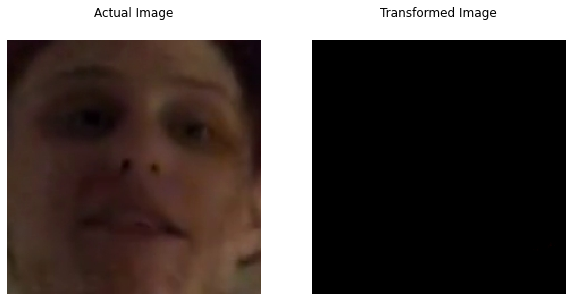

In [40]:
image = load_img(r'data\test_dfdc\fake\bbxqtnztyy_0.jpg')
transformed_img = normalize(image=image)['image']
comparison(image, transformed_img)

In [41]:
print(image.shape)
print(transformed_img.shape)

(224, 224, 3)
(224, 224, 3)


Load Data

In [14]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    r"data\test_dfdc",
    labels="inferred",
    label_mode="binary",
    #class_names=["fake", "real"],
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
)
class_names = ds_train.class_names
print(class_names)

Found 727 files belonging to 2 classes.
['fake', 'real']


In [98]:
print(tf.data.experimental.cardinality(ds_train).numpy())

23


In [99]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 1)


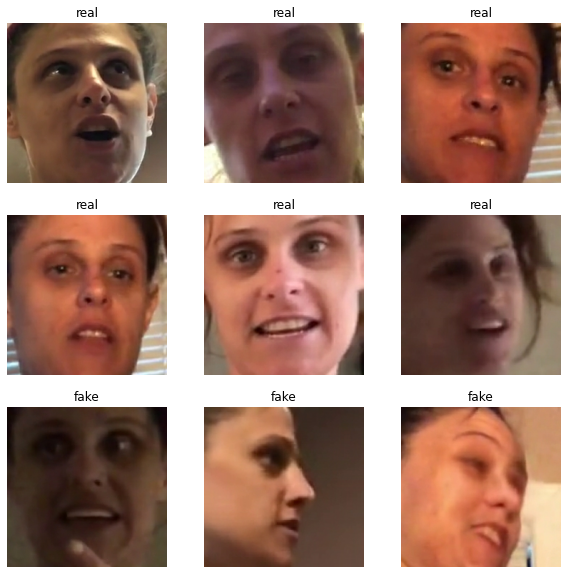

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy().astype("uint8")[0]])
    plt.axis("off")

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_train_transforms_h(img_size=int, p=float):
    """augment train data

    Args:
        img_size (int): _resize img to
        p (float): probability of applying all list of transforms

    Returns:
        _type_: augmentation pipeline
    """
    return alb.Compose([
        alb.ImageCompression(quality_lower=60, quality_upper=100, p=0.5),
        alb.GaussNoise(p=0.1),
        alb.GaussianBlur(blur_limit=3, p=0.05),
        alb.HorizontalFlip(),
        alb.VerticalFlip(),
        alb.Resize(height=img_size, width=img_size),
        alb.PadIfNeeded(min_height=img_size, min_width=img_size, border_mode=cv2.BORDER_CONSTANT),
        alb.OneOf([alb.RandomBrightnessContrast(), alb.HueSaturationValue(), 
                   alb.Emboss(), alb.Sharpen(), alb.CLAHE(clip_limit=2)], p=0.5),
        alb.OneOf([alb.CoarseDropout(), alb.GridDropout()], p=0.2), #cutout regions in the picture
        alb.OneOf([alb.ToGray(), alb.ToSepia()], p=0.2),
        alb.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, border_mode=cv2.BORDER_CONSTANT, p=0.5),
        #alb.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ], p=p
    )

def augment_image(imgs, labels, augmentation_pipeline: alb.Compose):
    def apply_augmentation(images):
        augmented_images = []

        for img in images:  # apply augmentation pipeline to single image
            aug_data = augmentation_pipeline(image=img.astype("uint8"))
            augmented_images.append(aug_data['image'])

        return np.stack(augmented_images)

    inputs = tf.numpy_function(func=apply_augmentation, inp=[imgs], Tout=tf.uint8)

    return inputs, labels


def get_dataset(dataset_path: str, augmentation_pipeline: alb.Compose, batch_size: int = 32, image_size= (224, 224), seed: int = 42, shuffle=True) -> tf.data.Dataset:
    augmentation_func = partial(augment_image, augmentation_pipeline=augmentation_pipeline,)

    dataset = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        labels="inferred",
        label_mode="binary",
        image_size=image_size,
        batch_size=batch_size,
        seed=seed,
        shuffle=shuffle
    )
    return dataset.map(augmentation_func, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

In [30]:
aug = get_train_transforms_h(224, 1.0)

train_dataset = get_dataset(
    r"data\test_dfdc",
    aug
)

Found 727 files belonging to 2 classes.


e:\anaconda\envs\deepfake-detection\lib\site-packages\albumentations\augmentations\blur\transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


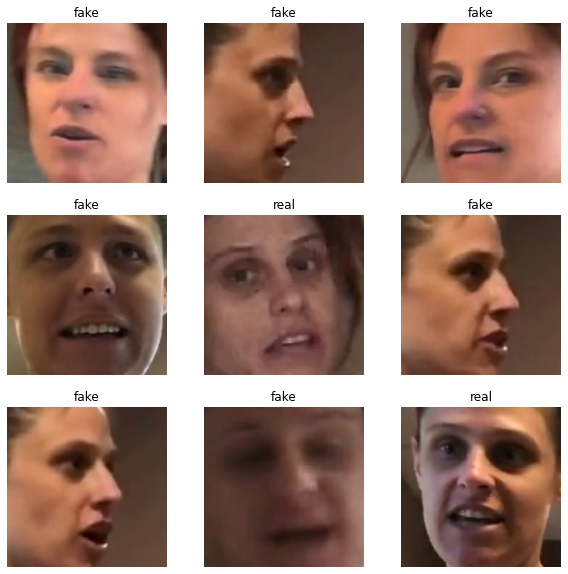

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy().astype("uint8")[0]])
    plt.axis("off")

In [35]:
image, label = next(iter(ds_train))
print(label)

tf.Tensor(
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]], shape=(32, 1), dtype=float32)


Training code to test

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
keras.utils.plot_model(model, show_shapes=True) # plot model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"]) #configure before train

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)) # get history to plot

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test) # evaluate

X_new = X_test[:3] #predict new instances
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
# checkpoints
# modell bauen und kompilieren wie vorher
checkpoint_cb = keras.callbacks.ModelCheckpoint("MyKerasModel.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("MyKerasModel.h5") #zum besten modell zurück

# weitere möglichkeit
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) #patience - anzahl an epochen keine verbesserung

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[checkpoint_cb, early_stopping_cb]) #so kann die eppoche hochgesetzt werden im training


In [ ]:
#tensorboard
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[tensorboard_cb])

In [ ]:
%load_ext tensorboard